In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import plotly as pl
import seaborn as sns
from datetime import date
from datetime import datetime


---
# Inicio

In [2]:
#Cargamos los datos y vemos los primeros registros
data = pd.read_csv('data/listings.csv')
data1 = pd.read_csv('data/listings_1.csv')
data2 = pd.read_csv('data/listings_2.csv')
data3 = pd.read_csv('data/listings_3.csv')
data = pd.concat([data, data1,data2,data3])
data = data.drop_duplicates()
data = data.reset_index()
data = data.drop(['index'], axis=1)
pd.set_option('display.max_columns', None)
data.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11508,https://www.airbnb.com/rooms/11508,20220922013624,2022-09-22,city scrape,Amazing Luxurious Apt-Palermo Soho,<b>The space</b><br />LUXURIOUS NEW APT: 1 BDR...,AREA: PALERMO SOHO<br /><br />Minutes walking ...,https://a0.muscache.com/pictures/19357696/b1de...,42762,https://www.airbnb.com/users/show/42762,Candela,2009-10-01,"New York, NY",-,within a few hours,100%,75%,f,https://a0.muscache.com/im/users/42762/profile...,https://a0.muscache.com/im/users/42762/profile...,Palermo,1.0,2.0,"['email', 'phone']",t,t,"Buenos Aires, Capital Federal, Argentina",Palermo,NaN,-34.58184,-58.42415,Entire condo,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Shared fenced garden or backyard"", ""Elevator...","$9,823.00",3,1125,3,3,1125,1125,3.0,1125.0,NaN,t,0,10,39,314,2022-09-22,30,3,0,2012-07-02,2022-07-17,4.77,4.93,4.86,4.90,4.97,4.93,4.93,NaN,f,1,1,0,0,0.24
1,118877,https://www.airbnb.com/rooms/118877,20220922013624,2022-09-22,city scrape,Entire Studio/apt in Buenos Aires,<b>The space</b><br />Inspired by the cultural...,NaN,https://a0.muscache.com/pictures/777724/21a535...,600320,https://www.airbnb.com/users/show/600320,Roxana,2011-05-18,"Buenos Aires, Argentina",Vivo en Palermo Hollywood hace mas de 20 años ...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/37f1b...,https://a0.muscache.com/im/pictures/user/37f1b...,Palermo,2.0,11.0,"['email', 'phone']",t,t,NaN,Palermo,NaN,-34.57734,-58.43790,Entire loft,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Pack \u2019n play/Travel crib"", ""Refrigerato...","$5,687.00",2,730,2,2,730,730,2.0,730.0,NaN,t,0,0,0,174,2022-09-22,24,5,0,2011-10-17,2022-06-21,4.63,4.55,4.77,4.77,4.86,4.45,4.64,NaN,t,2,2,0,0,0.18
2,14222,https://www.airbnb.com/rooms/14222,20220922013624,2022-09-22,city scrape,"RELAX IN HAPPY HOUSE - PALERMO, BUENOS AIRES",Beautiful cozy apartment in excellent location...,Palermo is such a perfect place to explore the...,https://a0.muscache.com/pictures/4695637/bbae8...,87710233,https://www.airbnb.com/users/show/87710233,María,2016-08-03,"Buenos Aires, Argentina","Soy Organizadora de Eventos, me gusta relacion...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/dc9d9...,https://a0.muscache.com/im/pictures/user/dc9d9...,NaN,4.0,6.0,"['email', 'phone']",t,t,"Palermo/Buenos Aires, Autonomous City of Bueno...",Palermo,NaN,-34.58617,-58.41036,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Host greets you"", ""Refrigerator"", ""Heating"",...","$3,728.00",7,1125,7,7,1125,1125,7.0,1125.0,NaN,t,6,19,49,324,2022-09-22,98,8,0,2012-07-10,2022-08-14,4.77,4.74,4.76,4.78,4.89,4.88,4.73,NaN,f,3,2,1,0,0.79
3,120874,https://www.airbnb.com/rooms/120874,20220922013624,2022-09-

---
# Vemos las columnas

In [3]:
data.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67145 entries, 0 to 67144
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            67145 non-null  int64  
 1   listing_url                                   67145 non-null  object 
 2   scrape_id                                     67145 non-null  int64  
 3   last_scraped                                  67145 non-null  object 
 4   source                                        17947 non-null  object 
 5   name                                          67129 non-null  object 
 6   description                                   64809 non-null  object 
 7   neighborhood_overview                         39817 non-null  object 
 8   picture_url                                   67145 non-null  object 
 9   host_id                                       67145 non-null 

---
Eliminamos las columnas que no aportan informacion

Estructura del dataset e información acerca de las columnas

https://docs.google.com/spreadsheets/d/1iWCNJcSutYqpULSQHlNyGInUvHg2BoUGoNRIGa6Szc4/edit#gid=1322284596



In [4]:
data = data.drop(['id','source','availability_30','availability_60','availability_90','availability_365','listing_url','scrape_id','last_scraped','picture_url','host_id','host_url','host_name',
       'host_location','host_neighbourhood','neighborhood_overview','neighbourhood','neighbourhood_group_cleansed',
      'host_thumbnail_url','host_about','host_response_time','host_has_profile_pic',
      'host_acceptance_rate','host_thumbnail_url','host_picture_url','host_listings_count',
      'minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights',
      'minimum_nights_avg_ntm','maximum_nights_avg_ntm','calendar_updated', 'calendar_last_scraped',
      'has_availability','host_response_time','host_total_listings_count','reviews_per_month',
      'number_of_reviews_ltm','number_of_reviews_l30d','first_review','last_review','instant_bookable',
      'review_scores_location','review_scores_accuracy','review_scores_cleanliness','host_response_rate',
                  'review_scores_checkin','review_scores_communication','review_scores_value',
                  'license','calculated_host_listings_count','calculated_host_listings_count_entire_homes',
      'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms'
    ], axis=1)
   

In [5]:
data.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67145 entries, 0 to 67144
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    67129 non-null  object 
 1   description             64809 non-null  object 
 2   host_since              67128 non-null  object 
 3   host_is_superhost       67128 non-null  object 
 4   host_verifications      67145 non-null  object 
 5   host_identity_verified  67128 non-null  object 
 6   neighbourhood_cleansed  67145 non-null  object 
 7   latitude                67145 non-null  float64
 8   longitude               67145 non-null  float64
 9   property_type           67145 non-null  object 
 10  room_type               67145 non-null  object 
 11  accommodates            67145 non-null  int64  
 12  bathrooms               0 non-null      float64
 13  bathrooms_text          66928 non-null  object 
 14  bedrooms                57237 non-null

In [6]:
data.head(5)

,name,description,host_since,host_is_superhost,host_verifications,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating
0,Amazing Luxurious Apt-Palermo Soho,<b>The space</b><br />LUXURIOUS NEW APT: 1 BDR...,2009-10-01,f,"['email', 'phone']",t,Palermo,-34.58184,-58.42415,Entire condo,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Shared fenced garden or backyard"", ""Elevator...","$9,823.00",3,1125,30,4.77
1,Entire Studio/apt in Buenos Aires,<b>The space</b><br />Inspired by the cultural...,2011-05-18,t,"['email', 'phone']",t,Palermo,-34.57734,-58.43790,Entire loft,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Pack \u2019n play/Travel crib"", ""Refrigerato...","$5,687.00",2,730,24,4.63
2,"RELAX IN HAPPY HOUSE - PALERMO, BUENOS AIRES",Beautiful cozy apartment in excellent location...,2016-08-03,f,"['email', 'phone']",t,Palermo,-34.58617,-58.41036,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Host greets you"", ""Refrigerator"", ""Heating"",...","$3,728.00",7,1125,98,4.77
3,Great apt 1 Bedroom - 1.5 Bath /Recoleta,<b>The space</b><br />This great apartment is ...,2011-04-23,t,"['email', 'phone']",t,Recoleta,-34.58991,-58.39931,Entire rental unit,Entire home/apt,4,NaN,1.5 baths,1.0,1.0,"[""Elevator"", ""Refrigerator"", ""Heating"", ""Carbo...","$6,514.00",14,1125,10,4.67
4,Spotless entire apt. Ideal location,Apartment is situated on 4th floor. There are ...,2011-03-06,t,"['email', 'phone']",f,Almagro,-34.61982,-58.41660,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Elevator"", ""Refrigerator"", ""Heating"", ""Carbo...","$3,584.00",5,730,29,4.79


<AxesSubplot:title={'center':'Nulos por columna'}, ylabel='Columna'>

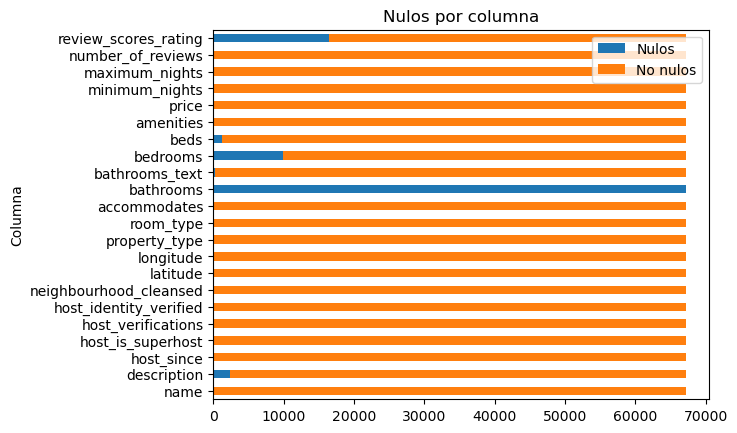

In [7]:
nulls = pd.DataFrame({'Columna':data.columns, 'Nulos':data.isnull().sum(),'No nulos':data.notnull().sum()})

# plot a Stacked Bar Chart using matplotlib
nulls.plot(
  x = 'Columna', 
  kind = 'barh', 
  stacked = True, 
  title = 'Nulos por columna', 
  mark_right = True)

Extraemos el tipo de baño y la cantidad

In [8]:
def extractBathRoomType(row):  
        if ("shared" in row["bathrooms_text"].lower()):
            return "shared"
        return "private"

def extractBathQuantity(row):  
        f = re.findall('\d*\.?\d+',row["bathrooms_text"])
        if (len(f)>0):
            return f[0]
        return "1"
    
data["bathrooms_text"] = data["bathrooms_text"].astype(str)
data["bathroomtype"] = data.apply(lambda x:extractBathRoomType(x),axis =1)   
data["bathrooms"] = data.apply(lambda x:extractBathQuantity(x),axis =1)   

data["bathrooms"] = data["bathrooms"].astype(float)
data["bathrooms"] = data["bathrooms"].apply(np.ceil)
data["bathrooms"] = data["bathrooms"].astype(int)
data = data.drop(['bathrooms_text'], axis=1)


In [9]:
data.bathrooms.value_counts()

1     48923
2     14264
3      2871
4       524
5       160
0       141
6       108
9        53
7        46
8        27
10        7
11        5
16        5
13        4
22        3
20        2
30        2
Name: bathrooms, dtype: int64

In [10]:
data.loc[data.review_scores_rating.isnull(),'review_scores_rating'] = 0


<AxesSubplot:title={'center':'Nulos por columna'}, ylabel='Columna'>

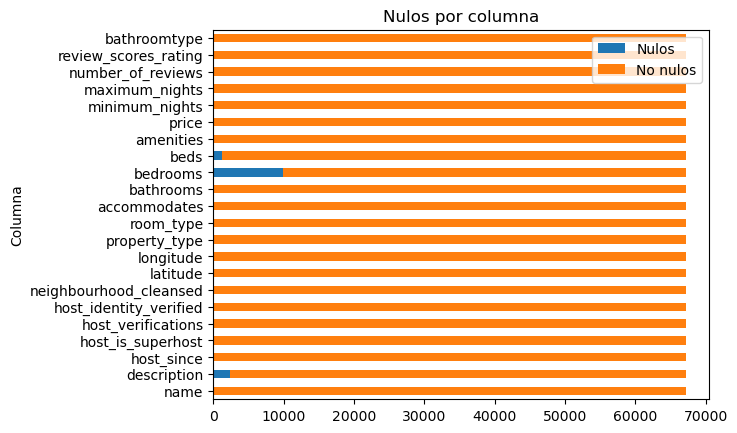

In [11]:
nulls = pd.DataFrame({'Columna':data.columns, 'Nulos':data.isnull().sum(),'No nulos':data.notnull().sum()})

# plot a Stacked Bar Chart using matplotlib
nulls.plot(
  x = 'Columna', 
  kind = 'barh', 
  stacked = True, 
  title = 'Nulos por columna', 
  mark_right = True)

In [12]:
#Relleno con patron regex según la palabra ambiente

numbers_es = ["mono","un","dos","tres","cuatro","cinco","seis"]
numbers_en = ["single","one","two","three","four","five","six"]


patron = '((?P<numero>\d|mono|un|dos|tres|cuatro|cinco|seis|single|one|two|three|four|five|six|1|2|3|4|5|6)\s*((?P<ambiente>amb)|(?P<bedroom>hab|bedroom|bdr)))'
patron_regex = re.compile(patron,flags = re.IGNORECASE)
  
          

In [13]:
#Rooms nulos antes
print('Nulos antes: ',data.bedrooms.isnull().sum())

def extractBedRoom(row):
    try:
        resultado=None
        ambientes=0
        if (row['description'] and isinstance(row['description'],str)):
            resultado = patron_regex.search(row['description'])
        if ((resultado is None) and row['name'] and isinstance(row['name'],str)):
            resultado = patron_regex.search(row['name'])
        if (resultado is not None):
            qty = 1
            if (resultado.group("numero") in numbers_es):
                qty = numbers_es.index(resultado.group("numero"))
                if (qty == 0):
                    qty = 1
            elif(resultado.group("numero") in numbers_en):
                qty = numbers_en.index(resultado.group("numero"))
                if (qty == 0):
                    qty = 1
            elif(isnumeric(resultado.group("numero"))):
                qty = int(resultado.group("numero"))
            if (resultado.group("ambiente")):
                if (qty > 1):
                    qty = qty - 1
            return qty    
    
    except:
        return np.nan       
            
        
data.loc[data.bedrooms.isnull(),'bedrooms'] = data.loc[data.bedrooms.isnull()].apply(extractBedRoom,axis=1)

#Rooms nulos despues de limpiar
print('Nulos después: ',data.bedrooms.isnull().sum())

Nulos antes:  9908
Nulos después:  8481


In [14]:
data.loc[data.bedrooms.isnull(),'bedrooms'] = 1
data.loc[data.beds.isnull(),'beds'] = 1

### Convertimos las columnas con true y false a números

In [15]:
data.replace({'f': 0, 't': 1}, inplace=True)

### Columna Precio

Quitamos el signo monetario, y lo convertimos a int

In [16]:
data.price = data.price.str[1:-3]
data.price = data.price.str.replace(",", "")
data.price = data.price.astype('int64')


In [17]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

data.price.describe()

count      67145.00000
mean        8927.28382
std       101725.68255
min            0.00000
25%         3000.00000
50%         4550.00000
75%         7238.00000
max     14330511.00000
Name: price, dtype: float64

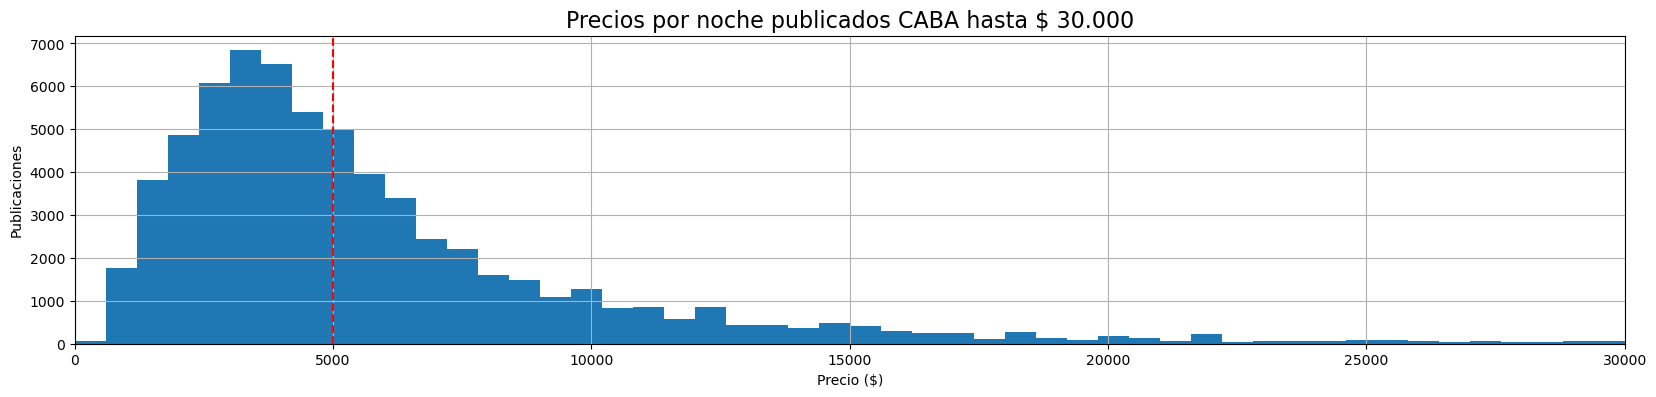

In [18]:
plt.figure(figsize=(20,4))
data.price.hist(bins=50, range=(0,30000))
plt.margins(x=0)
plt.axvline(5000, color='red', linestyle='--')
plt.title("Precios por noche publicados CABA hasta $ 30.000", fontsize=16)
plt.xlabel("Precio ($)")
plt.ylabel("Publicaciones")
plt.show()

### Tipo de propiedad

Vamos a normalizar los tipos de propiedades en Apartment, House, Hotel, y otros

In [19]:
data.property_type.value_counts()

Entire rental unit             42473
Private room in rental unit     4927
Entire condo                    4300
Entire loft                     2399
Entire condominium (condo)      2376
                               ...  
Shared room in ryokan              1
Private room in domed home         1
Shared room in chalet              1
Ranch                              1
Private room in in-law             1
Name: property_type, Length: 94, dtype: int64

In [20]:
data.room_type.value_counts()

Entire home/apt    56355
Private room        9287
Shared room          960
Hotel room           543
Name: room_type, dtype: int64

In [21]:
data.loc[data["property_type"].str.contains("Entire cottage|Ranch|Shared room in guest suite|house|casa|villa|home|townhouse|chalet|Entire place|Entire cabin",case=False,na=False),"property_type"] = "House"
data.loc[data["property_type"].str.contains("Cave|Shared room in ryokan|loft|apartment|dept|condo|floor|rental unit|Entire in-law|Entire guest suite|Private room in guest suite|Private room",case=False,na=False),"property_type"] = "Apartment"
data.loc[data["property_type"].str.contains("Pension|hostel|hotel|bed and breakfast|resort",case=False,na=False),"property_type"] = "Hotel"
data.loc[~data.property_type.isin(['House', 'Apartment','Hotel']), 'property_type'] = 'Other'


In [22]:
pd.set_option('display.max_rows', 500)
data.property_type.value_counts()

Apartment    60443
House         5635
Hotel         1020
Other           47
Name: property_type, dtype: int64

In [23]:
data = data.loc[data.property_type != "Hotel"]
data = data.loc[data.property_type != "Other"]
data = data.loc[data.room_type != "Hotel room"]
data.property_type.value_counts()

Apartment    60348
House         5635
Name: property_type, dtype: int64

In [24]:
data.describe()

,host_is_superhost,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating
count,65966.00000,65966.00000,65983.00000,65983.00000,65983.00000,65983.00000,65983.00000,65983.00000,65983.00000,65983.00000,65983.00000,65983.00000,65983.00000
mean,0.26074,0.76394,-34.59115,-58.41711,2.83903,1.35106,1.31328,1.91822,8516.80360,7.85380,622.64333,19.81729,3.55577
std,0.43904,0.42466,0.01881,0.03018,1.51502,0.72882,0.87071,1.54401,100424.65813,28.01694,947.73982,36.94055,2.09703
min,0.00000,0.00000,-34.69370,-58.54437,1.00000,0.00000,1.00000,1.00000,0.00000,1.00000,1.00000,0.00000,0.00000
25%,0.00000,1.00000,-34.60183,-58.43633,2.00000,1.00000,1.00000,1.00000,3000.00000,2.00000,90.00000,1.00000,0.00000
50%,0.00000,1.00000,-34.59042,-58.41793,2.00000,1.00000,1.00000,1.00000,4550.00000,3.00000,365.00000,5.00000,4.76000
75%,1.00000,1.00000,-34.58090,-58.39274,4.00000,2.00000,1.00000,2.00000,7235.00000,5.00000,1125.00000,22.00000,4.97000
max,1.00000,1.00000,-34.51399,-58.35553,16.00000,16.00000,35.00000,90.00000,14330511.00000,1000.00000,99999.00000,577.00000,5.00000


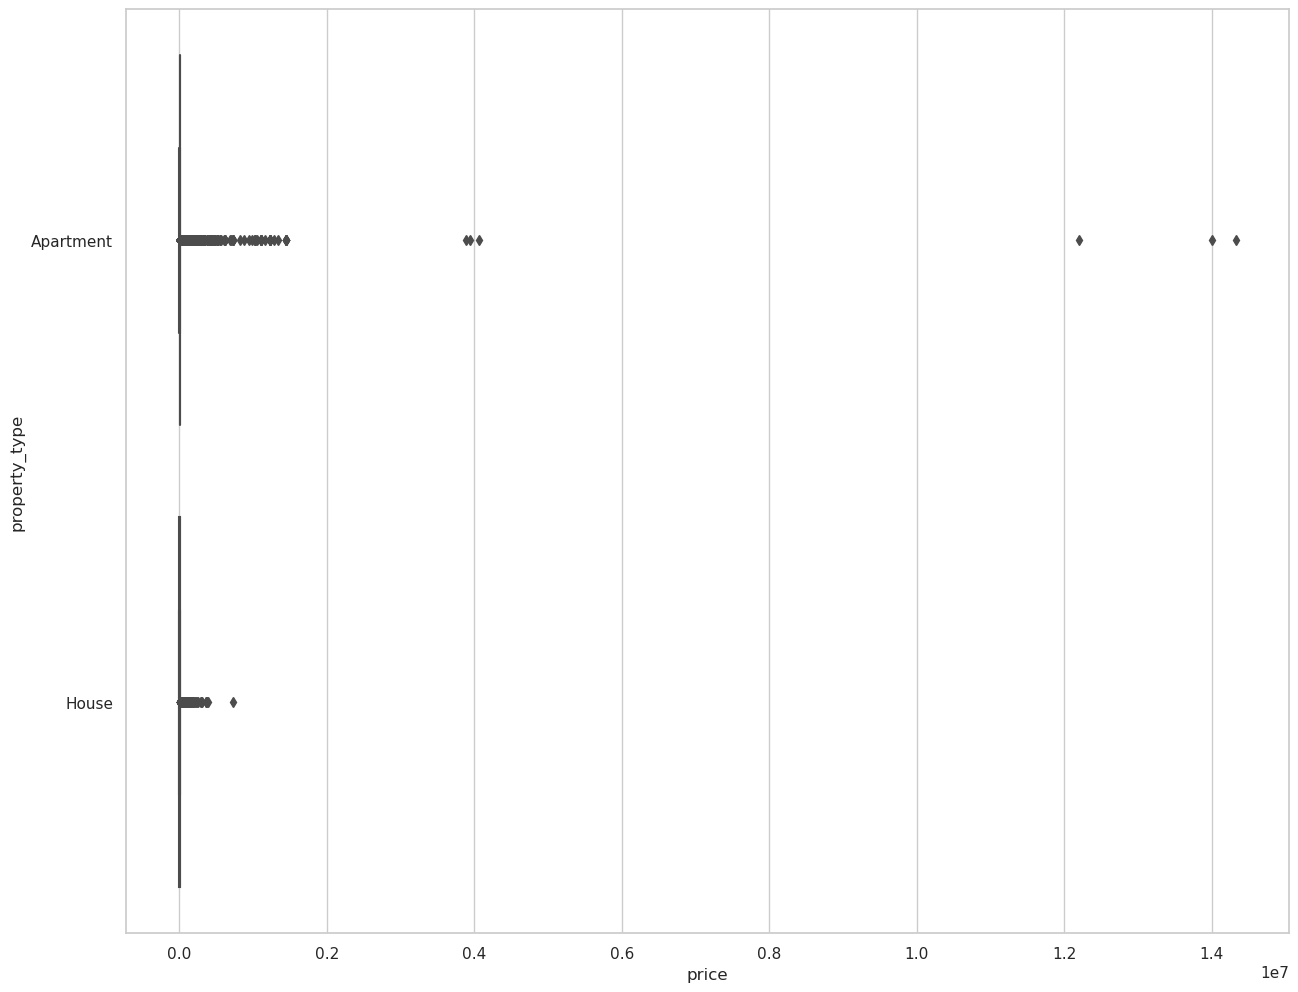

In [25]:
#Analizamos outliers mediante boxplot
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,12))
sns.boxplot(data=data, x="price", y="property_type", orient="h")
plt.show()

In [26]:
# quitar outliers de precios
data = data.loc[ data['price'] <  200000 ]
data = data.loc[ data['price'] >  1000 ]
data = data.loc[ data['price']< (data['price'].mean() + 3*data['price'].std())]

# data = data[np.logical_not(self._findOutliers(data, 'price',limit=3))]
# quitar outliers de baños
data = data[data.bathrooms < 6]        
# quitamos outliers de habitaciones
data = data[data.bedrooms < 10]


In [27]:
data.describe()

,host_is_superhost,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating
count,64310.00000,64310.00000,64326.00000,64326.00000,64326.00000,64326.00000,64326.00000,64326.00000,64326.00000,64326.00000,64326.00000,64326.00000,64326.00000
mean,0.26262,0.76633,-34.59103,-58.41714,2.78262,1.31289,1.27033,1.85881,5828.06814,7.63404,622.72070,20.06352,3.58506
std,0.44006,0.42316,0.01875,0.03012,1.31874,0.58409,0.60966,1.20220,4493.99868,25.84833,956.55194,37.14060,2.08106
min,0.00000,0.00000,-34.69370,-58.54437,1.00000,0.00000,1.00000,1.00000,1001.00000,1.00000,1.00000,0.00000,0.00000
25%,0.00000,1.00000,-34.60163,-58.43635,2.00000,1.00000,1.00000,1.00000,3000.00000,2.00000,90.00000,1.00000,2.00000
50%,0.00000,1.00000,-34.59032,-58.41794,2.00000,1.00000,1.00000,1.00000,4500.00000,3.00000,365.00000,6.00000,4.76000
75%,1.00000,1.00000,-34.58086,-58.39293,4.00000,2.00000,1.00000,2.00000,7077.00000,5.00000,1125.00000,22.00000,4.98000
max,1.00000,1.00000,-34.51399,-58.35553,16.00000,5.00000,9.00000,16.00000,32533.00000,1000.00000,99999.00000,577.00000,5.00000


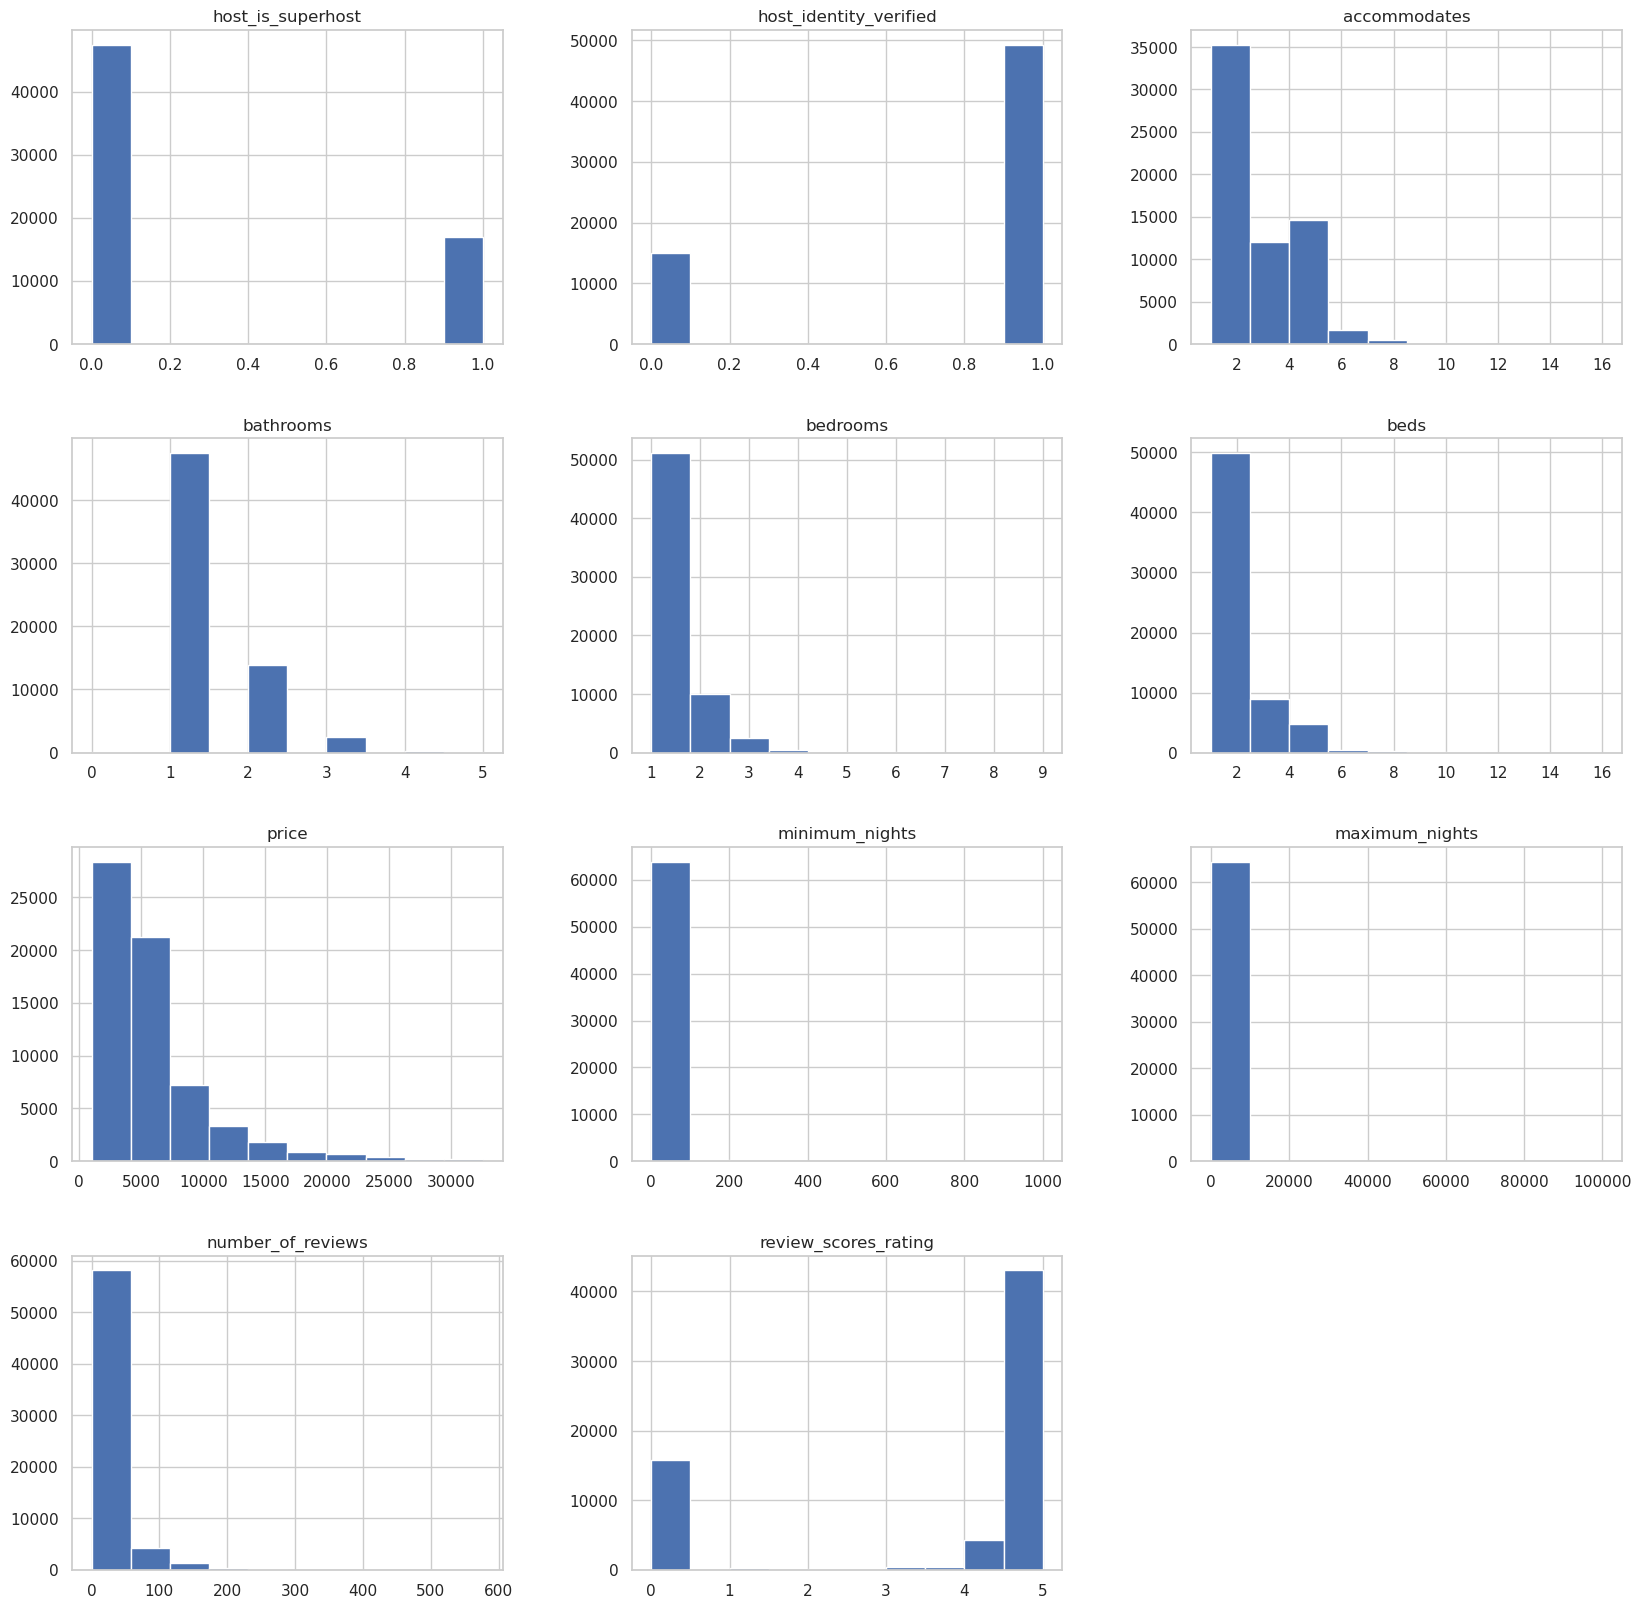

In [28]:
data.drop(['latitude','longitude'], axis=1).hist(figsize=(20,20));

# visualizamos la matriz de correlación en Seaborn usando a heatmap


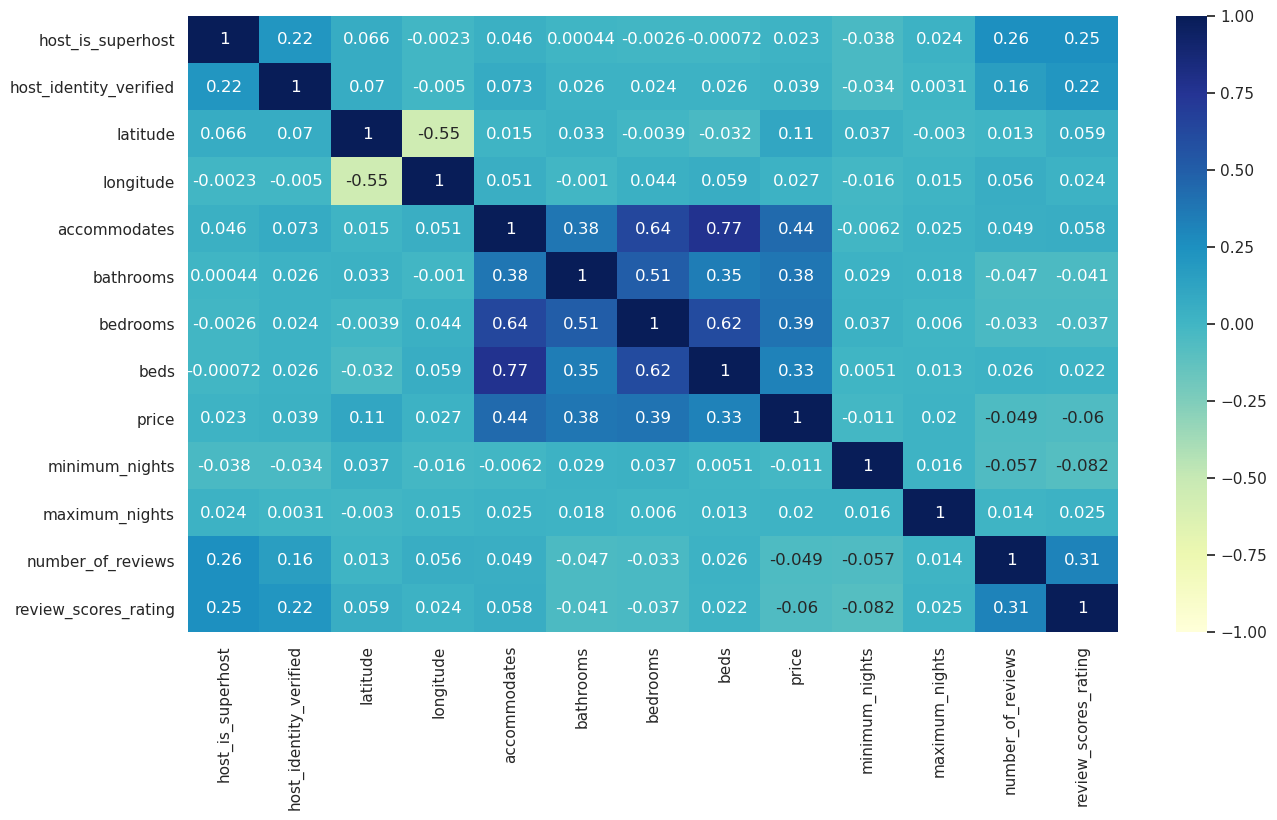

In [29]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(data.corr(), vmin=-1, vmax=1, center=0, cmap="YlGnBu",annot=True);

Tomamos los amenities

In [30]:
amenities = data.amenities.str.replace("[{}]", "").str.replace('"', "").str.replace('\\\\u2013', '-').str.replace('\\\\u2019','´').str.replace('\\\\u00f3','ó').str.replace('\\\\u00e9','é').str.replace('\\\\u00ed','í').str.replace('\\\\u00e1','á').str.replace('\\\\u00b4','').str.replace('\\\\u00f1','ñ').str.replace('\\\\u00a0','').str.replace('{', '').str.replace('}', ',').str.replace('[', '').str.replace(']', ',').str.replace('"', '')
amenities.head()    

0    Shared fenced garden or backyard, Elevator, Dr...
1    Pack ´n play/Travel crib, Refrigerator, Heatin...
2    Host greets you, Refrigerator, Heating, Essent...
3    Elevator, Refrigerator, Heating, Carbon monoxi...
4    Elevator, Refrigerator, Heating, Carbon monoxi...
Name: amenities, dtype: object

In [31]:
dict = [
        {"feature":"air_conditioning","values":["AC - split type ductless system","Air conditioning","aire acondicionado"]}
       ,{"feature":"pool","values":["Shared pool","pool","pileta","piscina"]}
       ,{"feature":"parking","values":["Paid parking on premises","Paid parking lot off premises","Paid parking off premises","private parking","estacionamiento","cochera"]}
       ,{"feature":"tv","values":["tv","HDTV","Smart TV"]}
       ,{"feature":"internet","values":["Wifi","High speed cable","internet","Ethernet connection"]}
       ,{"feature":"gym","values":["Exercise equipment","Gym","gimnasio"]}
       ,{"feature":"pet_friendly","values":["pet","pets","mascotas","mascota","Cat(s)","Dog(s)","perros","gatos"]}
       ,{"feature":"grill","values":["BBQ grill","parrilla","grill","BBQ","asador"]} 
       ,{"feature":"elevator","values":["Elevator","Ascensor","elevador"]}  
       ]        
     
    


In [32]:

for feat in dict:
    for x in feat["values"]:
        data.loc[data.amenities.str.contains(x,case=False,na=False),feat["feature"]] = 1 
        



/home/docker/.conda/envs/dhdsblend2021/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [33]:
data.loc[data.host_verifications.str.contains('phone',case=False,na=False),'phone_verification'] = 1 
data.loc[data.host_verifications.str.contains('work_email',case=False,na=False),'email_verification'] = 1 
data.loc[data.host_verifications.str.contains('email',case=False,na=False),'email_verification'] = 1 

data.loc[data['phone_verification']==1,"host_identity_verified"] = 1
data.loc[data['email_verification']==1,"host_identity_verified"] = 1
data = data.drop(['phone_verification','email_verification'], axis=1)


In [34]:
data = data.fillna(0)

In [35]:
data.neighbourhood_cleansed.value_counts()

Palermo              21631
Recoleta             10038
San Nicolas           3931
Retiro                3302
Belgrano              3047
Balvanera             2394
Monserrat             2310
Almagro               2254
Villa Crespo          1948
San Telmo             1808
Nuñez                 1555
Colegiales            1332
Caballito             1225
Chacarita              928
Puerto Madero          829
Constitucion           763
Villa Urquiza          702
Saavedra               541
Barracas               449
San Cristobal          353
Boca                   290
Flores                 272
Boedo                  270
Coghlan                206
Villa Devoto           205
Villa Ortuzar          191
Parque Patricios       154
Parque Chacabuco       151
Villa Pueyrredon       144
Villa Del Parque       139
Villa Santa Rita        99
Paternal                99
Parque Chas             92
Floresta                78
Agronomia               62
Villa Luro              57
Villa Gral. Mitre       56
V

In [36]:
data.loc[data.neighbourhood_cleansed == "Dique 1","neighbourhood_cleansed"] = "Puerto Madero"
data.loc[data.neighbourhood_cleansed == "Dique 4","neighbourhood_cleansed"] = "Puerto Madero"
data.loc[data.neighbourhood_cleansed == "Dique 3","neighbourhood_cleansed"] = "Puerto Madero"
data.loc[data.neighbourhood_cleansed == "Dique 2","neighbourhood_cleansed"] = "Puerto Madero"
data.neighbourhood_cleansed.value_counts()

Palermo              21631
Recoleta             10038
San Nicolas           3931
Retiro                3302
Belgrano              3047
Balvanera             2394
Monserrat             2310
Almagro               2254
Villa Crespo          1948
San Telmo             1808
Nuñez                 1555
Colegiales            1332
Caballito             1225
Chacarita              928
Puerto Madero          900
Constitucion           763
Villa Urquiza          702
Saavedra               541
Barracas               449
San Cristobal          353
Boca                   290
Flores                 272
Boedo                  270
Coghlan                206
Villa Devoto           205
Villa Ortuzar          191
Parque Patricios       154
Parque Chacabuco       151
Villa Pueyrredon       144
Villa Del Parque       139
Villa Santa Rita        99
Paternal                99
Parque Chas             92
Floresta                78
Agronomia               62
Villa Luro              57
Velez Sarsfield         56
V

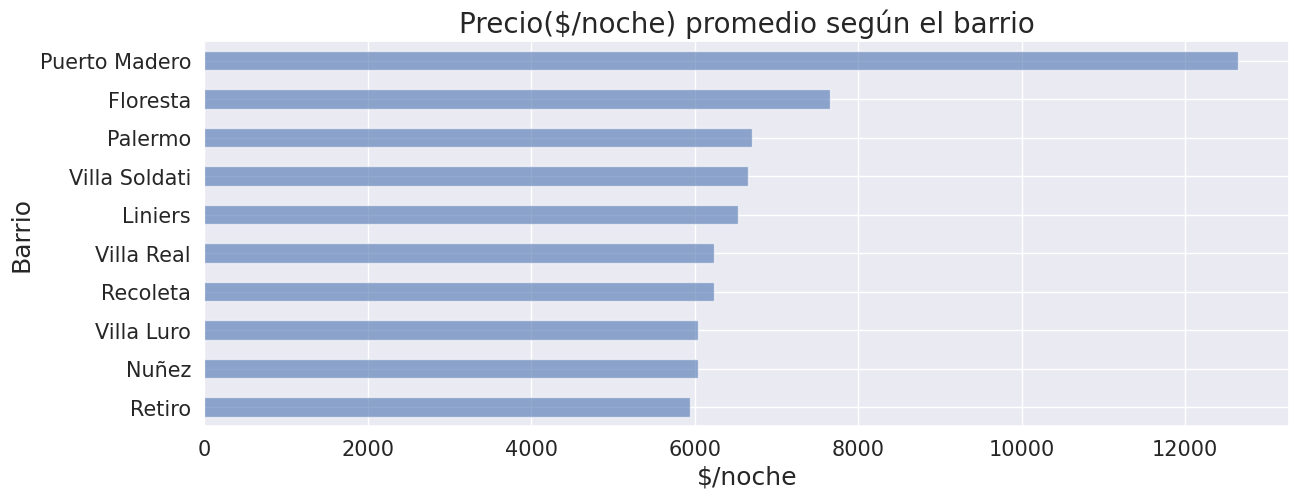

In [37]:
dfzone = data.groupby('neighbourhood_cleansed').mean()['price'].sort_values(ascending=False)[0:10]
g = dfzone.sort_values().plot.barh(figsize=(14,5),color='b',fontsize=15, alpha=0.6);
g.set_title("Precio($/noche) promedio según el barrio", fontsize=20)
g.set_ylabel("Barrio", fontsize=18)
g.set_xlabel("$/noche", fontsize=18)
plt.show()

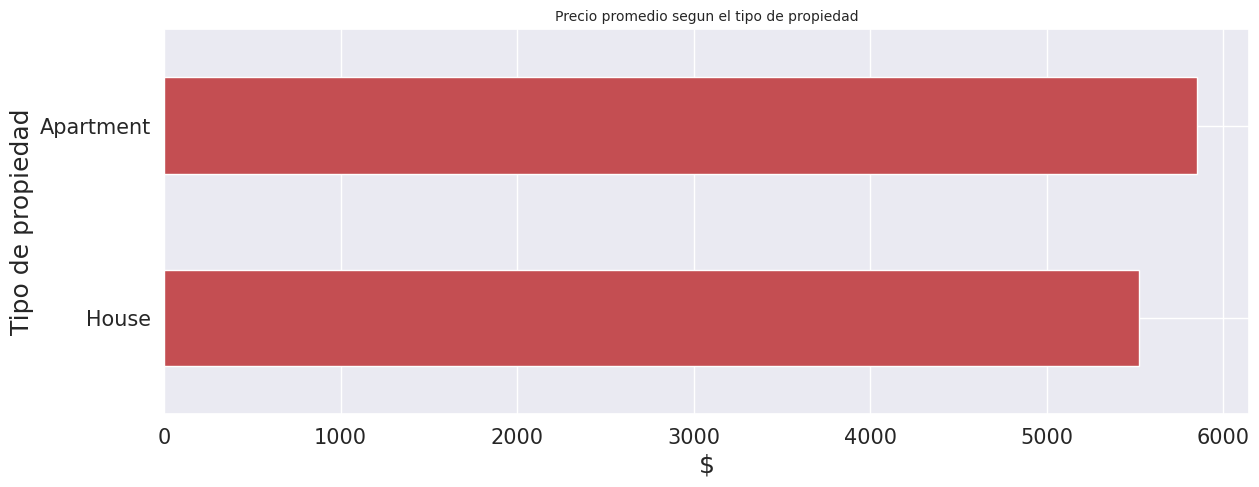

In [38]:
df_tipo_prop = data.groupby('property_type').mean()['price'].sort_values(ascending=False)[0:5]
graf = df_tipo_prop.sort_values().plot.barh(figsize=(14,5),fontsize=15, color='r')
graf.set_title("Precio promedio segun el tipo de propiedad", fontsize=10)
graf.set_ylabel("Tipo de propiedad", fontsize=18)
graf.set_xlabel("$", fontsize=18)
plt.show()

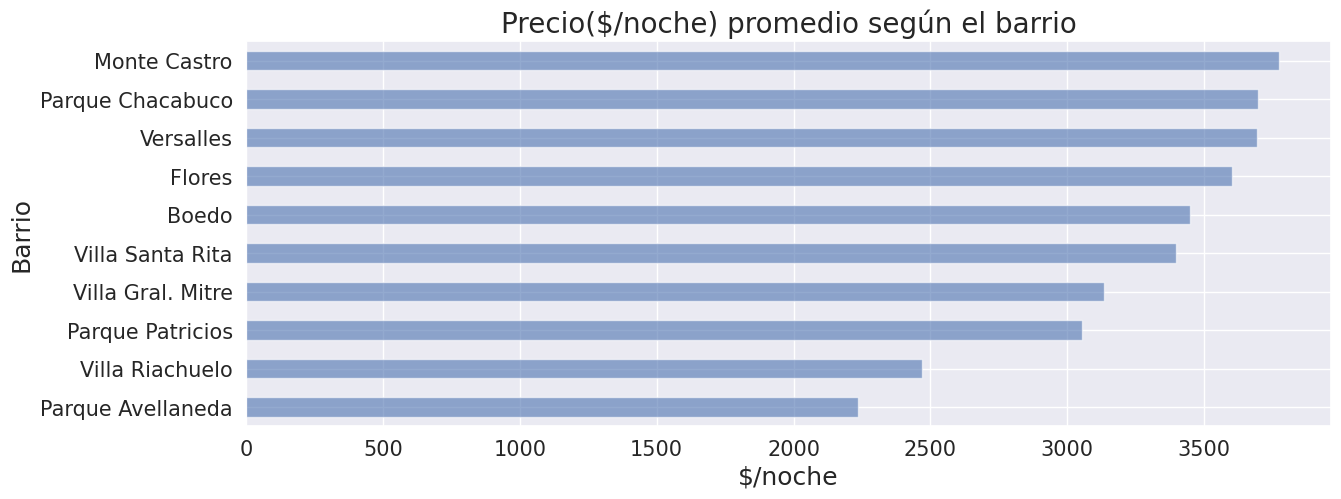

In [39]:
dfzone = data.groupby('neighbourhood_cleansed').mean()['price'].sort_values(ascending=True)[0:10]
g = dfzone.sort_values().plot.barh(figsize=(14,5),color='b',fontsize=15, alpha=0.6);
g.set_title("Precio($/noche) promedio según el barrio", fontsize=20)
g.set_ylabel("Barrio", fontsize=18)
g.set_xlabel("$/noche", fontsize=18)
plt.show()

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64326 entries, 0 to 67144
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    64326 non-null  object 
 1   description             64326 non-null  object 
 2   host_since              64326 non-null  object 
 3   host_is_superhost       64326 non-null  float64
 4   host_verifications      64326 non-null  object 
 5   host_identity_verified  64326 non-null  float64
 6   neighbourhood_cleansed  64326 non-null  object 
 7   latitude                64326 non-null  float64
 8   longitude               64326 non-null  float64
 9   property_type           64326 non-null  object 
 10  room_type               64326 non-null  object 
 11  accommodates            64326 non-null  int64  
 12  bathrooms               64326 non-null  int64  
 13  bedrooms                64326 non-null  float64
 14  beds                    64326 non-null

In [41]:
data = data.drop(['name','description','amenities','host_since','host_verifications','latitude','longitude'], axis=1)


In [42]:
data['bathrooms'] = data['bathrooms'].astype(int)
data['bedrooms'] = data['bedrooms'].astype(int)
data['air_conditioning'] = data['air_conditioning'].astype(int)
data['pool'] = data['pool'].astype(int)
data['parking'] = data['parking'].astype(int)
data['tv'] = data['tv'].astype(int)
data['parking'] = data['parking'].astype(int)
data['internet'] = data['internet'].astype(int)
data['gym'] = data['gym'].astype(int)
data['pet_friendly'] = data['pet_friendly'].astype(int)
data['pet_friendly'] = data['pet_friendly'].astype(int)
data['grill'] = data['grill'].astype(int)
data['elevator'] = data['elevator'].astype(int)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64326 entries, 0 to 67144
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_is_superhost       64326 non-null  float64
 1   host_identity_verified  64326 non-null  float64
 2   neighbourhood_cleansed  64326 non-null  object 
 3   property_type           64326 non-null  object 
 4   room_type               64326 non-null  object 
 5   accommodates            64326 non-null  int64  
 6   bathrooms               64326 non-null  int64  
 7   bedrooms                64326 non-null  int64  
 8   beds                    64326 non-null  float64
 9   price                   64326 non-null  int64  
 10  minimum_nights          64326 non-null  int64  
 11  maximum_nights          64326 non-null  int64  
 12  number_of_reviews       64326 non-null  int64  
 13  review_scores_rating    64326 non-null  float64
 14  bathroomtype            64326 non-null

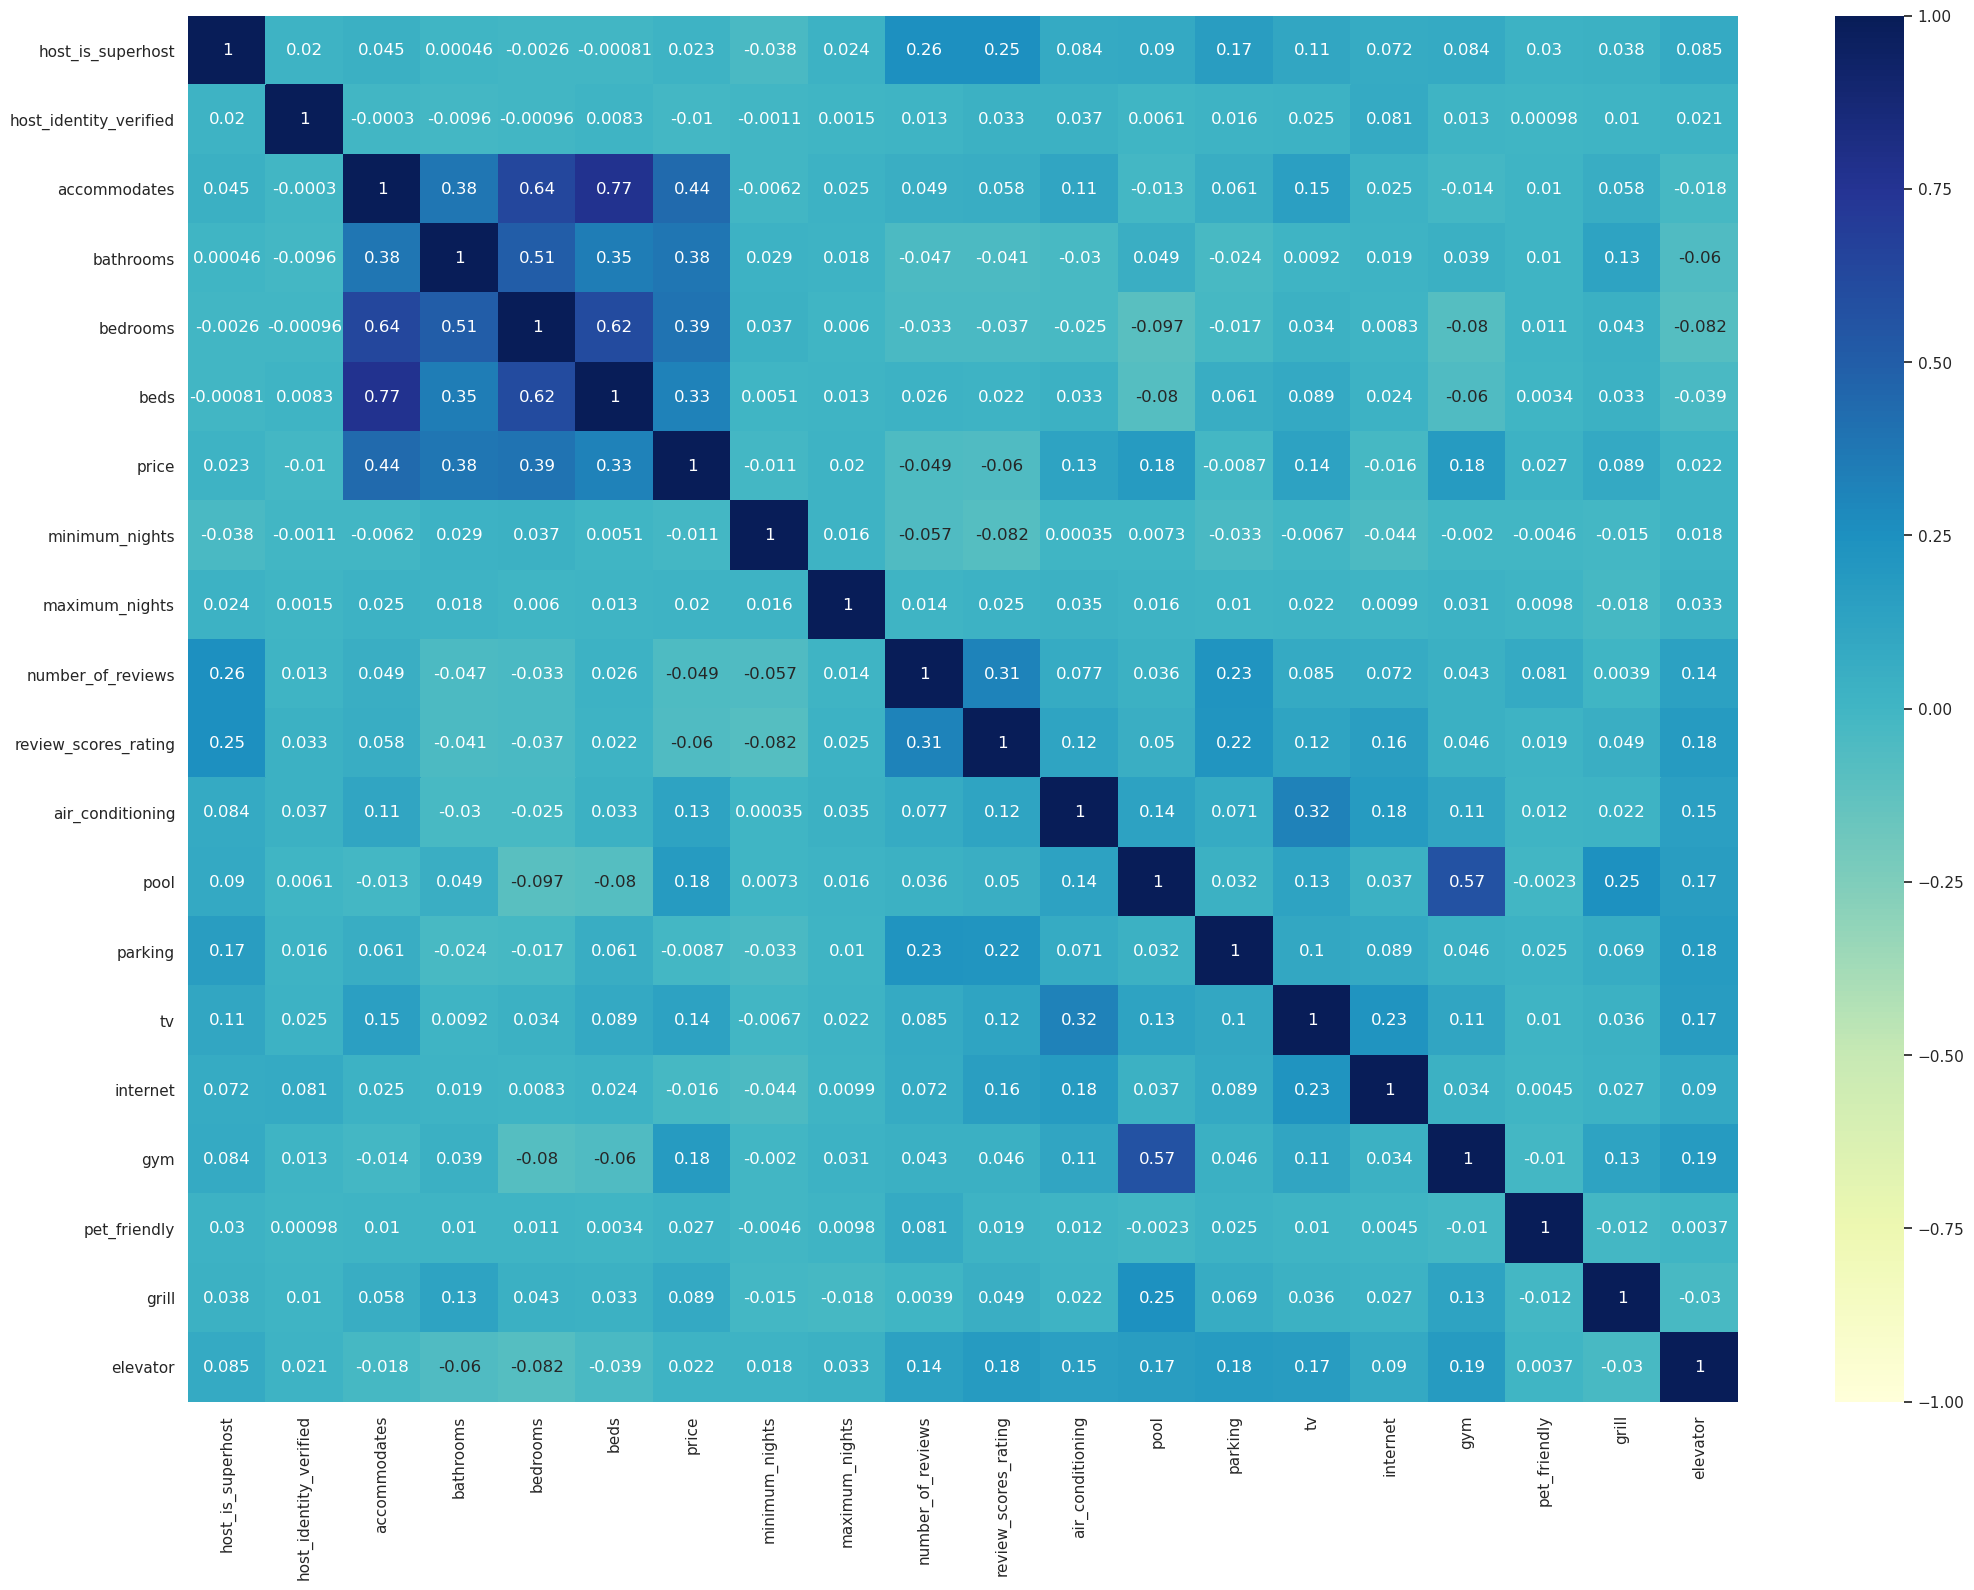

In [43]:
sns.set(rc = {'figure.figsize':(25,18)})
sns.heatmap(data.corr(), vmin=-1, vmax=1, center=0, cmap="YlGnBu",annot=True);

In [44]:
data = pd.get_dummies(data)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64326 entries, 0 to 67144
Data columns (total 75 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   host_is_superhost                         64326 non-null  float64
 1   host_identity_verified                    64326 non-null  float64
 2   accommodates                              64326 non-null  int64  
 3   bathrooms                                 64326 non-null  int64  
 4   bedrooms                                  64326 non-null  int64  
 5   beds                                      64326 non-null  float64
 6   price                                     64326 non-null  int64  
 7   minimum_nights                            64326 non-null  int64  
 8   maximum_nights                            64326 non-null  int64  
 9   number_of_reviews                         64326 non-null  int64  
 10  review_scores_rating              

In [45]:
data.columns = data.columns.str.replace('neighbourhood_cleansed_', '')
data.columns = data.columns.str.replace('property_type_Apartment', 'Apartment')
data.columns = data.columns.str.replace('property_type_House', 'House')
data.columns = data.columns.str.replace('room_type_Private room', 'Private room')
data.columns = data.columns.str.replace('room_type_Shared room', 'Shared room')
data.columns = data.columns.str.replace('room_type_Entire home/apt', 'Entire home/apt')
data.to_csv("dataclean.csv")